In [1]:
from math import pi
from pathlib import Path

import numpy as np
import pandas as pd

from cowerc_adsorption import (
    PhysicalParams,
    Simulation,
    ExperimentalBreakthroughData,
    plot_btc_and_data,
)

In [2]:
excel_file = Path("../../.data/Data and Column Properties.xlsx")
sheet_name = "WW All Contaminants 0.62-min"

In [3]:
# Read Emma's excel report
xls_setup = pd.read_excel(excel_file, sheet_name=sheet_name, nrows=18, usecols="A:B", index_col=0)
setup = xls_setup.to_dict()["Unnamed: 1"]

xls_setup

,Unnamed: 1
Design Parameters,
Column Diameter (cm),0.660000
Column Area (cm^2),0.340000
Particle Size (cm),0.016800
Column Diameter/Particle Size Ratio,39.285714
Reynold's Number,0.270000
Bed Voidage (ε),0.500000
Hydraulic Loading Rate (cm/s),0.080000
EBCT,0.260000
Flow Rate (mL/s),0.028000


In [4]:
xls_influent = pd.read_excel(excel_file, sheet_name=sheet_name, skiprows=11, nrows=3, usecols="D:J")
xls_influent.set_index("Unnamed: 3", inplace=True)

print("Influent in ng/L")
xls_influent

Influent in ng/L


,PFOA,PFHxA,PFHxS,BEZ,DCF,PFBA
Unnamed: 3,,,,,,
Inf 1-14,384.10,431.050,365.650,228.0,237.0,297.90
inf 12-16,495.00,471.000,548.000,283.0,338.0,389.00
INF AVG,439.55,451.025,456.825,255.5,287.5,343.45


In [5]:
xls_btc = pd.read_excel(excel_file, sheet_name=sheet_name, header=19, usecols="A:Q")
xls_btc.rename(columns=lambda x: x.strip(), inplace=True)
xls_btc

,Sample ID,Time (min.),Cum. Vol.,Bed Vol Passed (BV),Specific Throughput,PFOA,PFOA C/C0,PFHxA,PFHxA C/C0,PFHxS,PFHxS C/C0,BEZ,BEZ C/C0,DCF,DCF C/C0,PFBA,PFBA C/C0
0,1.0,346.909091,572.400,555.728155,2289.600,2.70,0.007029,1.80,0.004176,0.00,0.000000,2.75,0.012061,1.25,0.005274,3.45,0.011581
1,2.0,1077.545455,1777.950,1726.165049,7111.800,3.85,0.010023,9.55,0.022155,0.00,0.000000,5.75,0.025219,0.85,0.003586,111.00,0.372608
2,3.0,3065.050909,5057.334,4910.033010,20229.336,0.00,0.000000,14.70,0.034103,0.00,0.000000,51.80,0.227193,4.60,0.019409,311.35,1.045149
3,4.0,4385.050909,7235.334,7024.596117,28941.336,0.00,0.000000,49.25,0.114256,0.00,0.000000,125.90,0.552193,14.70,0.062025,340.55,1.143169
4,5.0,6015.050909,9924.834,9635.761165,39699.336,5.15,0.013408,106.00,0.245911,0.00,0.000000,161.90,0.710088,35.30,0.148945,299.80,1.006378
5,6.0,8725.960000,14397.834,13978.479612,57591.336,5.45,0.014189,154.45,0.358311,0.00,0.000000,177.25,0.777412,56.65,0.239030,255.50,0.857670
6,7.0,10722.323636,17691.834,17176.537864,70767.336,20.60,0.053632,212.35,0.492634,0.00,0.000000,211.35,0.926974,83.75,0.353376,313.55,1.052534
7,7.5,13558.687273,22371.834,21720.227184,89487.336,25.65,0.066779,261.75,0.607238,2.35,0.006427,229.15,1.005044,108.95,0.459705,292.75,0.982712
8,8.0,16519.196364,27256.674,26462.790291,109026.696,97.45,0.253710,308.15,0.714882,5.50,0.015042,235.00,1.030702,133.10,0.561603,361.95,1.215005
9,9.0,19108.650909,31529.274,30610.945631,126117.096,55.40,0.144233,339.15,0.786800,13.35,0.036510,244.45,1.072149,157.25,0.663502,316.45,1.062269


In [6]:
porosity = setup["Bed Voidage (ε)"]
lenght = setup["Bed Length (cm)"]

area = 0.25 * pi * setup["Column Diameter (cm)"] ** 2  # cm²
pore_velocity = setup["Flow Rate (mL/min)"] / (area * porosity)  # cm/min

print(f"Porosity: {porosity:.2f}")
print(f"Length: {lenght:.2f}")
print(f"Pore velocity: {pore_velocity:.4f}")

Porosity: 0.50
Length: 3.00
Pore velocity: 9.6458


In [7]:
contaminants = ["PFBA", "BEZ", "PFHxA", "DCF", "PFOA", "PFHxS"]
molecular_weight = {"PFBA": 214.04, "BEZ": 361.8, "PFHxA": 314.05, "DCF": 296.1, "PFOA": 414.1, "PFHxS": 400.11}

c_0 = xls_influent.loc["INF AVG"][contaminants].to_numpy()  # ng/L
c_0 = c_0 / np.array(list(molecular_weight.values()))  # nmol/L

print("Initial concentrations [nM]:")
for k, v in zip(contaminants, c_0):
    print(f"{k:>6}: {v:.3f}")

Initial concentrations [nM]:
  PFBA: 1.605
   BEZ: 0.706
 PFHxA: 1.436
   DCF: 0.971
  PFOA: 1.061
 PFHxS: 1.142


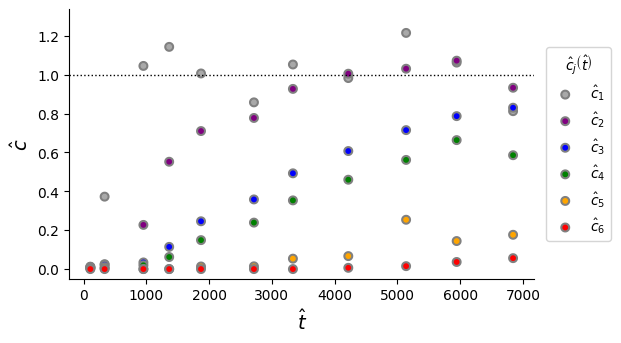

In [8]:
experimental_data = ExperimentalBreakthroughData(
    time=np.round((xls_btc["Time (min.)"] * lenght / pore_velocity), 2).to_numpy(),
    conc=xls_btc[[f"{k} C/C0" for k in contaminants]].to_numpy().T,
    c_0=c_0,
)

experimental_data.plot_breakthrough()

In [9]:
print(", ".join(f"{x}" for x in experimental_data.time))
print(", ".join(f"{x:.3f}" for x in experimental_data.c_0))

107.89, 335.14, 953.29, 1363.83, 1870.79, 2713.93, 3334.83, 4216.99, 5137.76, 5943.13, 6841.82
1.605, 0.706, 1.436, 0.971, 1.061, 1.142


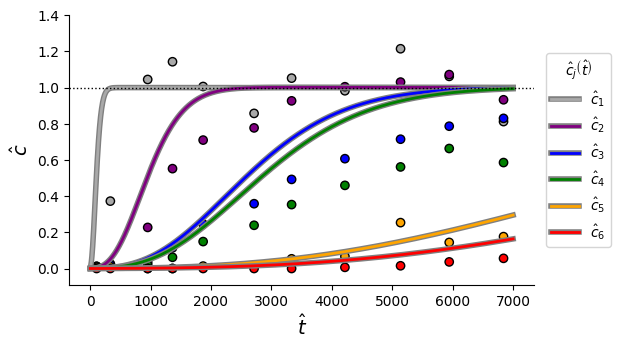

In [10]:
# Trying out some arbitrary parameters

p = PhysicalParams(
    L=lenght,  # cm
    v=pore_velocity,  # cm/min
    n=porosity,  # -
    sm=9.6e5,  # nmol/cm³
    k_ads=(20, 30, 30, 30, 30, 32),  # 1/min
    k_des=(0.18, 0.03, 0.011, 0.01, 0.003, 0.0025),  # 1/min
    C_0=c_0,
)

sim = Simulation(**p.nondim)
sim.end_time = 7000
sim.write_every = 500
sim.cfl = 0.85
sim.solve()

display(plot_btc_and_data(sim, experimental_data))

In [11]:
print(*(f"{np.log10(k):.2f}" for k in (p.sm,)))
print(*(f"{np.log10(k):.2f}" for k in p.k_ads))
print(*(f"{np.log10(k):.2f}" for k in p.k_des))

5.98
1.30 1.48 1.48 1.48 1.48 1.51
-0.74 -1.52 -1.96 -2.00 -2.52 -2.60


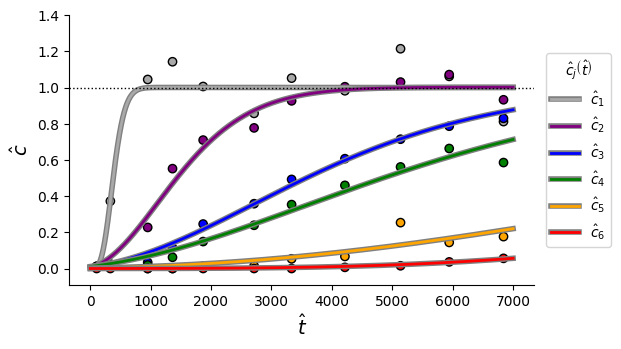

In [16]:
# Fitting data using OSTRICH

optimal_parameter_set = [
    5.989977e00,
    1.672639e00,
    1.240160e00,
    1.199761e00,
    1.172545e00,
    1.307147e00,
    1.599541e00,
    -9.249415e-01,
    -1.962056e00,
    -2.406064e00,
    -2.569741e00,
    -2.817371e00,
    -2.633392e00,
]

optimal_parameter_set = [10**k for k in optimal_parameter_set]

p = PhysicalParams(
    L=lenght,
    v=pore_velocity,
    n=porosity,
    sm=optimal_parameter_set[0],
    k_ads=optimal_parameter_set[1:7],
    k_des=optimal_parameter_set[7:],
    C_0=experimental_data.c_0,
)

sim = Simulation(**p.nondim)
sim.end_time = 7000
sim.write_every = 500
sim.cfl = 0.80
sim.solve()

display(plot_btc_and_data(sim, experimental_data))

In [17]:
display(p)

PhysicalParams(L=3.0, v=9.645754126781533, n=0.5, sm=977185.4683734986, k_ads=array([47.05859971, 17.38441176, 15.84021237, 14.87801527, 20.28369166,
       39.76866387]), k_des=array([0.11886623, 0.010913  , 0.00392587, 0.00269314, 0.00152275,
       0.00232599]), C_0=array([1.60460662, 0.70619127, 1.43615666, 0.97095576, 1.06145858,
       1.14174852]))

In [18]:
for k, v in p.nondim.items():
    print(f"{k}: {', '.join(map(lambda x: f'{x:.3E}', v))}")

Dam_ads: 1.464E+01, 5.407E+00, 4.927E+00, 4.627E+00, 6.309E+00, 1.237E+01
Dam_des: 3.697E-02, 3.394E-03, 1.221E-03, 8.376E-04, 4.736E-04, 7.234E-04
kappa: 8.210E-07, 3.613E-07, 7.348E-07, 4.968E-07, 5.431E-07, 5.842E-07
bc: 1.000E+00, 1.000E+00, 1.000E+00, 1.000E+00, 1.000E+00, 1.000E+00


In [19]:
len(sim.btc[0])

1750